In [1]:
from dreimac import GeometryExamples, PlotUtils, ComplexProjectiveCoords, ProjectiveMapUtils, GeometryUtils

import matplotlib.pyplot as plt
import numpy as np
from persim import plot_diagrams

%load_ext autoreload
%autoreload 2

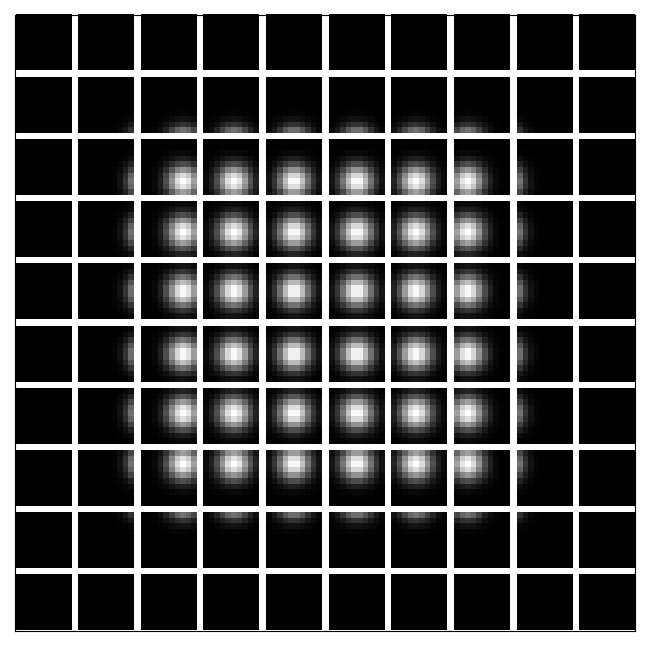

In [2]:
small_sample = GeometryExamples.moving_dot(10, sigma=2)

plt.figure(figsize=(8,8))
_ = PlotUtils.plot_patches(small_sample, zoom=4)

In [3]:
P = GeometryExamples.moving_dot(100, sigma=2)
dist_mat, pointcloud_permutation = GeometryUtils.landmark_geodesic_distance(P, 300, 20)

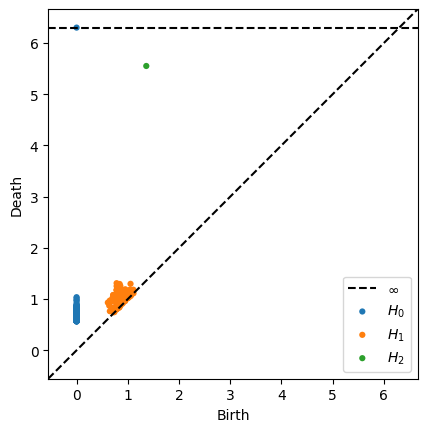

In [4]:
cpc = ComplexProjectiveCoords(dist_mat, n_landmarks=300, distance_matrix=True)

fig = plt.figure()
plot_diagrams(cpc.dgms_)

In [5]:
coords = cpc.get_coordinates(perc=0.9, proj_dim=1, cocycle_idx=0, projective_dim_red_mode="exponential")
coords_R3 = ProjectiveMapUtils.hopf_map(coords)
coords_R2 = ProjectiveMapUtils.stereographic_projection_hemispheres(coords_R3)

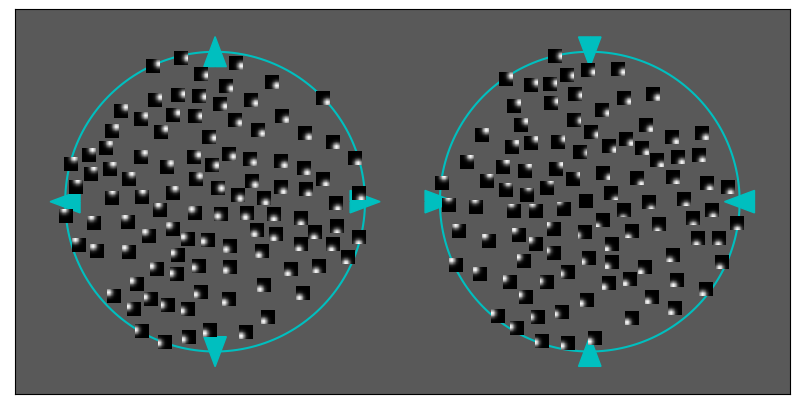

In [30]:
subsample = GeometryUtils.get_greedy_perm_pc(coords_R2, 200)['perm']

plt.figure(figsize=(10, 5))
PlotUtils.imscatter(coords_R2[subsample], P[pointcloud_permutation][subsample], 10)
_ = PlotUtils.plot_sphere_boundary()